# Understanding the data that we have

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import librosa

In [3]:
current_working_directory= os.getcwd()
main_directory = os.path.dirname(current_working_directory)
category_data_folder_path = os.path.join(main_directory,"Audio_Data")

In [4]:
def get_child_discomfort_categories(category_data_folder_path):
    child_discomfort_categories_raw = os.listdir(category_data_folder_path)
    
    child_discomfort_categories = []
    for i in child_discomfort_categories_raw:
        cat = i.replace("_"," ")
        cat = " ".join(word.capitalize() for word in cat.split())
        child_discomfort_categories.append(cat)
        
    return child_discomfort_categories_raw, child_discomfort_categories

child_discomfort_categories_raw, child_discomfort_categories = get_child_discomfort_categories(category_data_folder_path)
print(child_discomfort_categories_raw)
print(child_discomfort_categories)

['asphyxia', 'deaf', 'hunger', 'normal', 'not_cry', 'others', 'pain']
['Asphyxia', 'Deaf', 'Hunger', 'Normal', 'Not Cry', 'Others', 'Pain']


### We have the infant crying audio with following discomfort:
* Asphyxia
* Deaf
* Hunger
* Normal
* Not Cry
* Pain
* Others - ["Tired","Burping","Discomfort"]


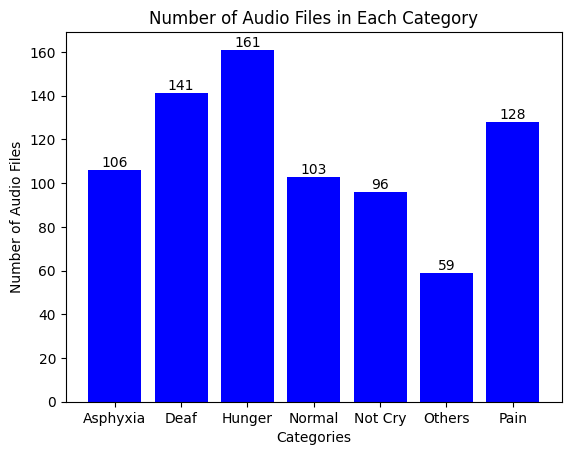

In [6]:
def count_audio_files(folder_path):
    category_counts = {}
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        
        if os.path.isdir(category_path):
            audio_files = [file for file in os.listdir(category_path) if file.endswith('.wav') or file.endswith('.mp3')]
            category_counts[category] = len(audio_files)
    
    return category_counts

def plot_bar_graph(category_counts):
    categories = child_discomfort_categories
    counts = list(category_counts.values())
    
    plt.bar(categories, counts, color='blue')
    plt.xlabel('Categories')
    plt.ylabel('Number of Audio Files')
    plt.title('Number of Audio Files in Each Category')

    for i, count in enumerate(counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

    plt.show()


audio_counts = count_audio_files(category_data_folder_path)
plot_bar_graph(audio_counts)


#### We have some imbalanced category in dataset.

## Detail about important library to work with audio file "librosa"

Librosa is a Python package for music and audio analysis. It provides tools for a variety of tasks related to audio processing, feature extraction, and analysis. Librosa is widely used in the fields of music information retrieval, audio signal processing, and machine learning for audio applications.

Some key features and functionalities of librosa include:

1. **Audio Loading:** Librosa allows you to load audio files in various formats and provides functions to manipulate and extract information from them.

2. **Feature Extraction:** It provides tools for extracting various audio features such as Mel-frequency cepstral coefficients (MFCCs), chroma feature, spectral contrast, and more. These features are commonly used for audio analysis and machine learning applications.

3. **Time-Frequency Representations:** Librosa allows you to create time-frequency representations of audio signals, such as spectrograms and chromagrams, which are useful for visualizing and analyzing the frequency content of audio over time.

4. **Beat and Tempo Analysis:** Librosa includes functions for beat tracking and tempo estimation, which are essential for music analysis.

5. **Pitch Estimation:** It provides tools for estimating pitch and harmonic content in audio signals.

6. **Time-Domain and Frequency-Domain Manipulation:** Librosa allows you to manipulate audio signals in both the time and frequency domains.

7. **Machine Learning Integration:** Librosa is often used in conjunction with machine learning libraries for audio classification, genre recognition, and other audio-related tasks.

Librosa simplifies many of the complex tasks associated with audio analysis, making it easier for researchers, developers, and data scientists to work with audio data in Python. It's a valuable tool for anyone working on projects involving audio processing, music analysis, or machine learning with audio data.

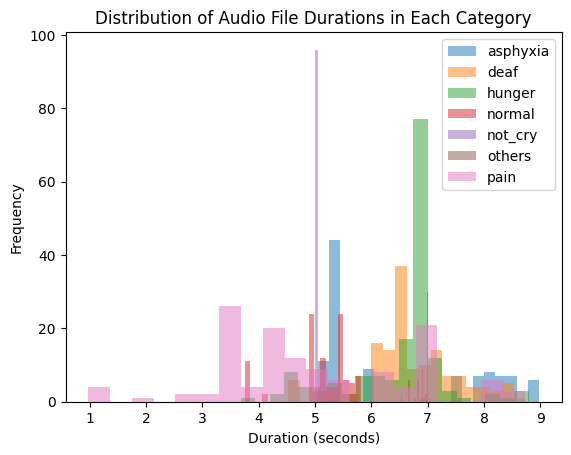

In [7]:

def get_audio_file_durations(folder_path):
    category_durations = {}

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        if os.path.isdir(category_path):
            audio_files = [file for file in os.listdir(category_path) if file.endswith('.wav') or file.endswith('.mp3')]
            durations = [librosa.get_duration(filename=os.path.join(category_path, file)) for file in audio_files]
            category_durations[category] = durations

    return category_durations

def plot_duration_distribution(category_durations):
    for category, durations in category_durations.items():
        plt.hist(durations, bins=20, alpha=0.5, label=category)

    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Audio File Durations in Each Category')
    plt.legend()
    plt.show()


audio_durations = get_audio_file_durations(category_data_folder_path)
plot_duration_distribution(audio_durations)


### The audio lenght of Burping is unevnely distributed with maximum length of 7 sec.